In [152]:
import requests
import json
import pickle
import re
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from datetime import datetime, timedelta
from copy import deepcopy
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook as tqdm
from sklearn import preprocessing
from didyoumean.didyoumean import didYouMean

In [327]:
master_df = pickle.load(open('master_df.p', 'rb'))
master_df.head()

,America/Chicago,America/Denver,America/Los_Angeles,America/New_York,America/Sao_Paulo,Australia/Melbourne,de_DE,en_GB,es_ES,fr_FR,it_IT,pt_PT,ru_RU
2018-12-10 00:00:00,18.474359,65.000000,1653.125000,75.223881,464.0,33.250000,24996.425287,20290.532110,292204.545455,313923.729730,908518.000000,NaN,7.150
2018-12-10 00:01:00,20.298077,65.277778,2363.667593,74.153483,461.2,2214.770833,24878.622605,20524.833639,291231.374242,311809.599099,893444.558333,NaN,13.925
2018-12-10 00:02:00,22.121795,65.555556,3074.210185,73.083085,458.4,4396.291667,24760.819923,20759.135168,290258.203030,309695.468468,878371.116667,NaN,20.700
2018-12-10 00:03:00,23.945513,65.833333,3784.752778,72.012687,455.6,6577.812500,24643.017241,20993.436697,289285.031818,307581.337838,863297.675000,NaN,27.475
2018-12-10 00:04:00,25.769231,66.111111,4495.295370,70.942289,452.8,8759.333333,24525.214559,21227.738226,288311.860606,305467.207207,848224.233333,NaN,34.250


In [369]:
def plot(df,ax, date):
    colors = {'America/Chicago': '#02b3e4',
              'America/Denver': '#f95c3c' ,
              'America/Los_Angeles': '#ff5483',
              'America/New_York': '#ecc81a',
              'America/Sao_Paulo': '#35978f',
              'Australia/Melbourne': '#f15c3c',
               'de_DE': "#ccece6",
               'en_GB': "#bfd3e6",
               'es_ES': "#d7301f",
               'fr_FR': "#ffffe5",
               'it_IT': "#807dba",
               'pt_PT': "#737373",
               'ru_RU': "#252525"}
    coordinates_lat_long = {'America/Chicago': (41.881832, -87.623177),
                            'America/Denver': (39.7392358, -104.990251),
                            'America/Los_Angeles': (34.052235, -118.243683),
                            'America/New_York': (40.730610, -73.935242),
                            'America/Sao_Paulo': (-23.533773, -46.625290),
                            'Australia/Melbourne': (-37.815018, 144.946014),
                            'de_DE': (52.520008, 13.404954),
                           'en_GB': (51.509865, -0.118092),
                           'es_ES': (40.416775, -3.703790),
                           'fr_FR': (48.864716, 2.349014),
                           'it_IT': (41.890251, 12.492373),
                           'pt_PT': (38.736946, -9.142685),
                           'ru_RU': (55.751244, 37.618423)}
    fontname = 'Avenir'
    fontsize = 28
    date_x = -43
    date_y = -50
    if ax is None:
        fig = plt.figure(figsize=(19.2, 10.8))
        ax = plt.axes(projection=ccrs.Mercator(central_longitude=0,  
                                               min_latitude=-65,
                                               max_latitude=70))
    os.environ["CARTOPY_USER_BACKGROUNDS"] = "/anaconda3/envs/wow/lib/python3.7/site-packages/cartopy/BG/"
    ax.background_img(name='BM', resolution='low')
    ax.set_extent([-170, 179, -65, 70], crs=ccrs.PlateCarree())
    ax.text(date_x, date_y, 
        f"{date.strftime('%H:%M h')}", 
        color='white',
        fontname=fontname, fontsize=fontsize*1.3,
        transform=ccrs.PlateCarree())
    
    for timezone in df:

        #grad_counts = school_data.groupby(['Long', 'Lat']).count()

        # Get lists for longitudes and latitudes of graduates
        lats = coordinates_lat_long[timezone][0]
        longs = coordinates_lat_long[timezone][1]    


        x = df[timezone].loc[date]
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(np.reshape(x,(-1,1)))
        
        sizes = np.log(x) * 1000

        ax.scatter(longs, lats, s=sizes.astype(int),
                   color=colors[timezone], alpha=0.8,
                   transform=ccrs.PlateCarree())

/anaconda3/envs/wow/lib/python3.7/site-packages/sklearn/preprocessing/data.py:353: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/anaconda3/envs/wow/lib/python3.7/site-packages/sklearn/preprocessing/data.py:354: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/anaconda3/envs/wow/lib/python3.7/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/anaconda3/envs/wow/lib/python3.7/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/anaconda3/envs/wow/lib/python3.7/site-packages/sklearn/preprocessing/data.py:353: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/anaconda3/envs/wow/lib/python3.7/site-packages/sklearn/preprocessing/data.py:354: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax

KeyboardInterrupt: 

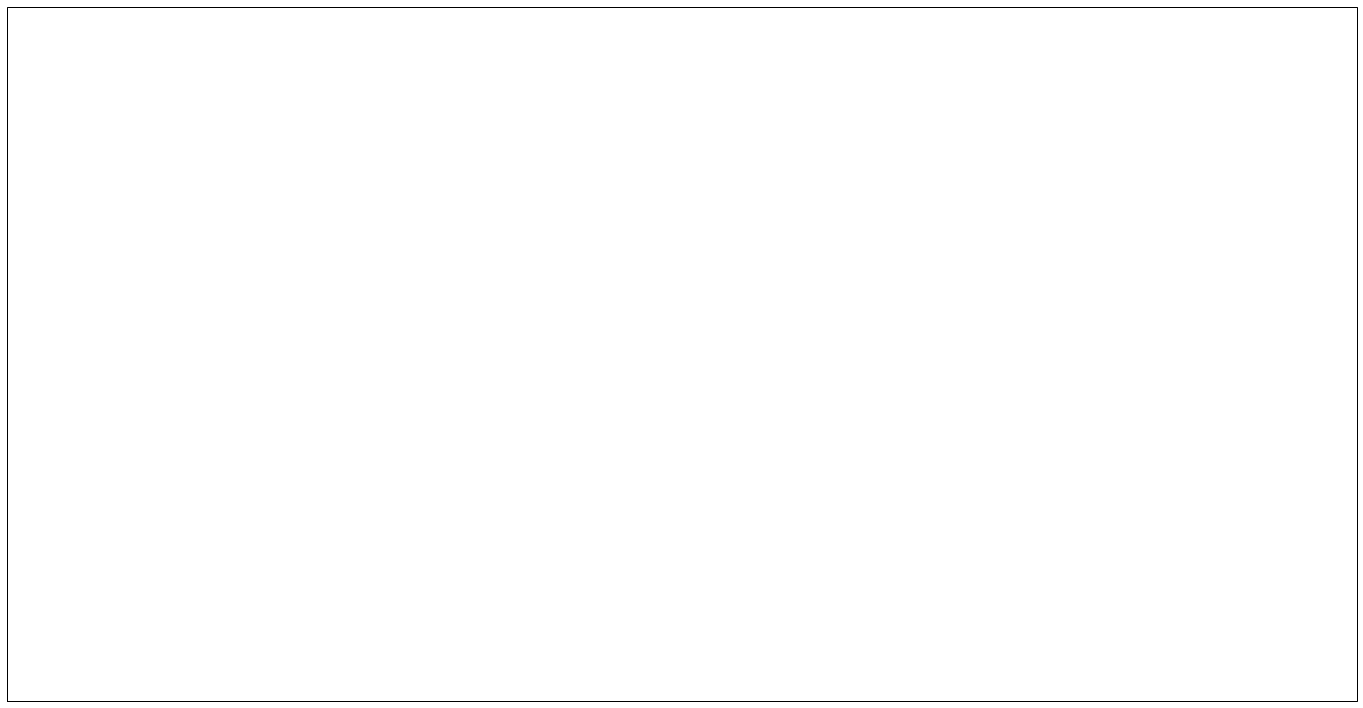

In [371]:
fig = plt.figure(figsize=(19.2, 10.8))
ax = plt.axes(projection=ccrs.Mercator(min_latitude=-65,
                                       max_latitude=70))
for i, timestamp in enumerate(list(master_df.index)):
    plot(master_df, ax, datetime(2018,12,10,5))
    fig.tight_layout(pad=-0.5)
    fig.savefig(f"frames/frame_{i}.png", dpi=100,     
                frameon=False, facecolor='black')
    ax.clear()